In [1]:
import yt
import drawSvg as draw
import numpy as np

In [2]:
@yt.derived_field(name = 'xx', units = 'cm')
def _xx(field, data):
    return data['x'].copy()

/home/matthewturk/conda-py3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: UserWarning: Because 'sampling_type' is not specified, yt will assume a 'cell' sampling_type for the ('gas', 'xx') field
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
grid1 = {'left_edge': [0.0, 0.0, 0.0],
         'right_edge': [1.0, 1.0, 1.0],
         'dimensions': [8, 8, 8],
         'level': 0}
grid2 = {'left_edge': [0.375, 0.375, 0.375],
         'right_edge': [0.75, 0.75, 0.75],
         'level': 1,
         'dimensions': [6, 6, 6]}
ds = yt.load_amr_grids([grid1, grid2], [8, 8, 8])

yt : [INFO     ] 2020-03-06 10:41:08,540 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-03-06 10:41:08,541 Parameters: domain_dimensions         = [8 8 8]
yt : [INFO     ] 2020-03-06 10:41:08,546 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-03-06 10:41:08,548 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-03-06 10:41:08,552 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2020-03-06 10:42:15,459 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-06 10:42:15,461 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-06 10:42:15,472 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-06 10:42:15,476 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-06 10:42:15,482 Making a fixed resolution buffer of (('gas', 'xx')) 800 by 800



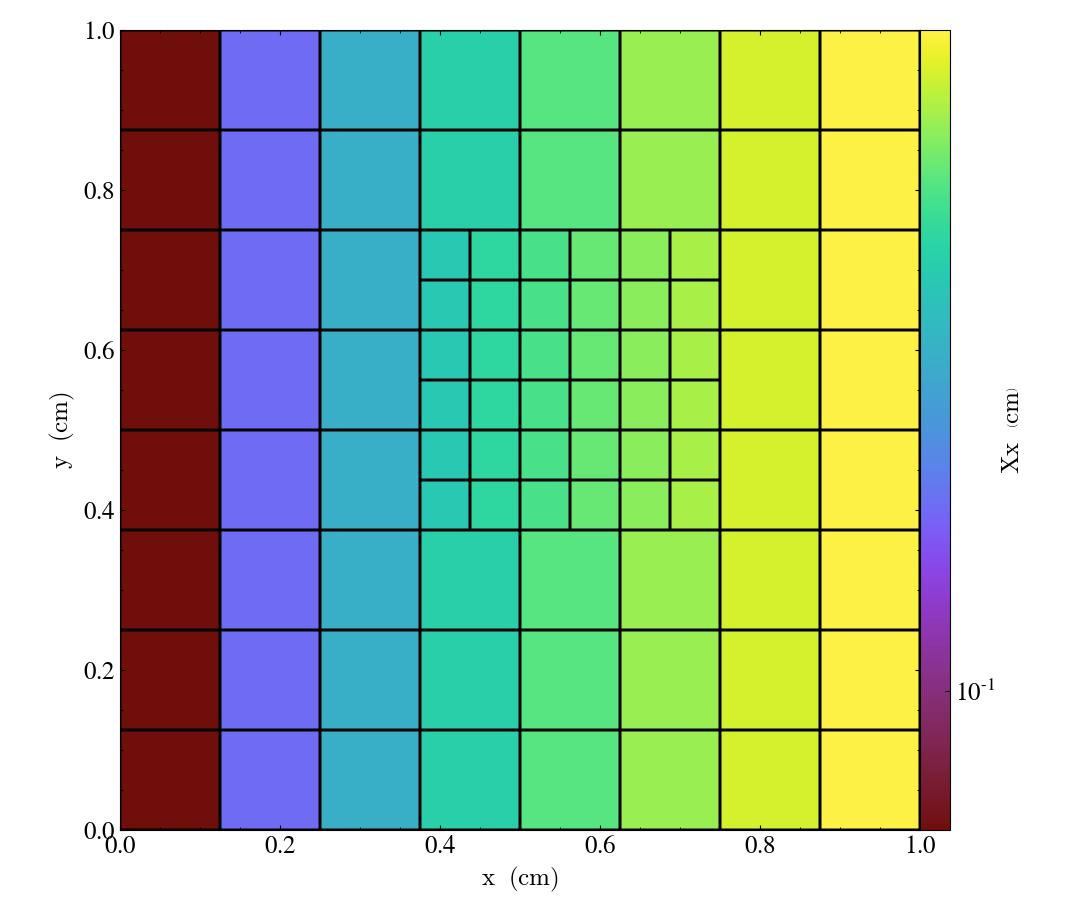

In [8]:
s = yt.SlicePlot(ds, "z", "xx", origin = 'native')
s.annotate_cell_edges()

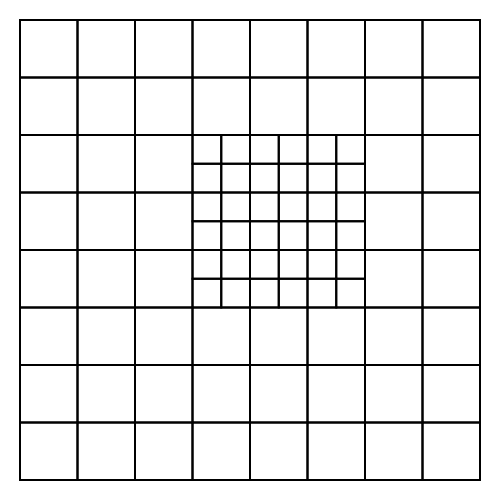

In [22]:
width = 500
height = 500
margin = 20
d = draw.Drawing(width = width, height = height)
scale_x = lambda v: margin + (width - 2*margin) * v
scale_y = lambda v: margin + (height - 2*margin) * v
grid_cells = draw.Group()
xs = s.data_source["px"].v
ys = s.data_source["py"].v
dx2s = s.data_source["pdx"].v
dy2s = s.data_source["pdy"].v
for x, y, dx2, dy2 in zip(xs, ys, dx2s, dy2s):
    r = draw.Rectangle(x = scale_x(x - dx2),
                       y = scale_y(y - dy2),
                       width = scale_x(x + dx2) - scale_x(x - dx2),
                       height = scale_y(y + dy2) - scale_y(y - dy2),
                       stroke = "black", stroke_width = 2.0,
                       fill = "none")
    d.append(r)
display(d)

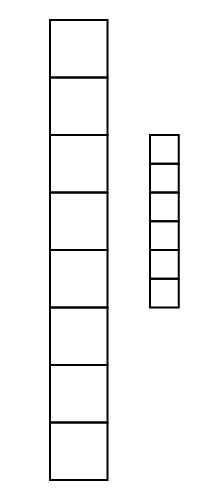

In [32]:
d = draw.Drawing(width = 200, height = 500)
_, uys = np.unique(ys, return_index = True)
udx2s = np.unique(dx2s).tolist()[::-1]
for i in uys:
    y = ys[i]
    dy2 = dy2s[i]
    x = xs[i]
    dx2 = dx2s[i]
    r = draw.Rectangle(x = 50 + 100 * udx2s.index(dx2),
                       y = scale_y(y - dy2),
                       width = scale_x(x + dx2) - scale_x(x - dx2),
                       height = scale_y(y + dy2) - scale_y(y - dy2),
                       stroke = "black", stroke_width = 2.0,
                       fill = "none")
    d.append(r)
display(d)

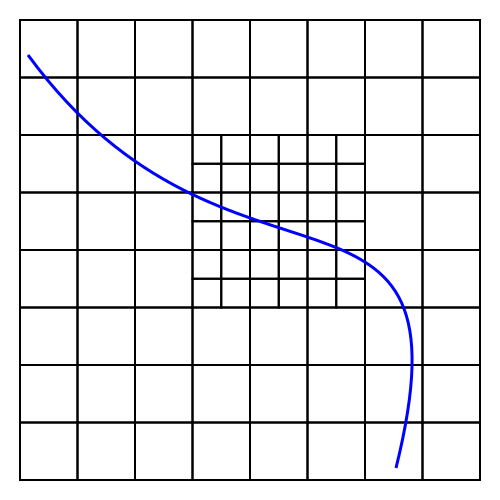

In [48]:
width = 500
height = 500
margin = 20
d = draw.Drawing(width = width, height = height)
scale_x = lambda v: margin + (width - 2*margin) * v
scale_y = lambda v: margin + (height - 2*margin) * v
grid_cells = draw.Group()
xs = s.data_source["px"].v
ys = s.data_source["py"].v
dx2s = s.data_source["pdx"].v
dy2s = s.data_source["pdy"].v
for x, y, dx2, dy2 in zip(xs, ys, dx2s, dy2s):
    r = draw.Rectangle(x = scale_x(x - dx2),
                       y = scale_y(y - dy2),
                       width = scale_x(x + dx2) - scale_x(x - dx2),
                       height = scale_y(y + dy2) - scale_y(y - dy2),
                       stroke = "black", stroke_width = 2.0,
                       fill = "none")
    d.append(r)
p = draw.Path(stroke = "blue", stroke_width = 3.0, fill='none')
p.M(28,445)
p.C(230,169, 478, 363, 396, 32)
d.append(p)
display(d)